In [2]:
import pandas as pd
import pyarrow.parquet as pq

## Create filtered dataframe

Create filtered dataframe of only the sport category

In [ ]:
import pyarrow.parquet as pq

parquet_file_path = "yt_metadata_en.parquet"

pq_metadata = pq.ParquetFile(parquet_file_path)

# Initialize an empty DataFrame to store the filtered data
filtered_df = pd.DataFrame()

# Iterate through the batches and filter the necessary columns
for batch in pq_metadata.iter_batches(batch_size=1_000_000):
    temp_df = batch.to_pandas().drop(columns=['description'])


    temp_df = temp_df[temp_df['categories'].apply(lambda x: 'Sports' in x)]
    filtered_df = pd.concat([filtered_df, temp_df], ignore_index=True)
    print(f"Current size of filtered_df: {filtered_df.shape}")
    print(f"Memory usage of filtered_df: {filtered_df.memory_usage(deep=True).sum() / (1024 ** 2):.2f} MB")

In [ ]:
filtered_df

### Save file

In [ ]:
filtered_df.to_parquet("filtered_sport_category_without_description_column_metadata.parquet", engine="fastparquet")

### Read file

In [5]:
filtered_df = pd.read_parquet("filtered_sport_category_without_description_column_metadata.parquet", engine="fastparquet")

## Analysis

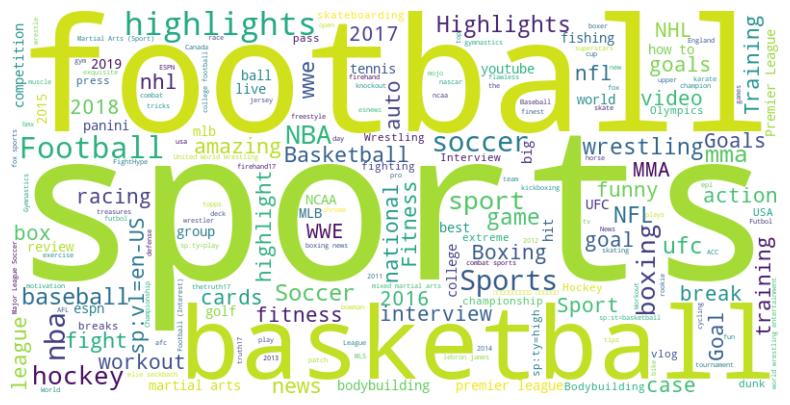

In [6]:
from collections import Counter
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Extract tags and split them into individual tags

# Combine all tags into a single list
all_tags = [tag for sublist in filtered_df['tags'].str.split(',').tolist() for tag in sublist]

# Count the frequency of each tag
tag_counts = Counter(all_tags)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

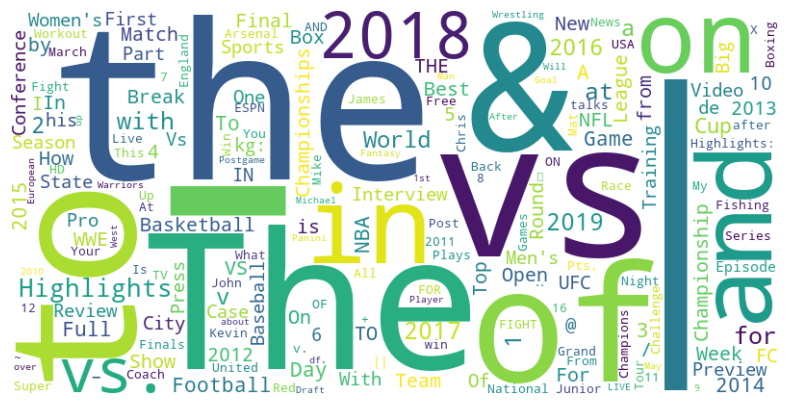

In [7]:
all_titles = [title for title in filtered_df['title'].str.split(' ').tolist() for title in title]

# Count the frequency of each tag
tag_counts = Counter(all_titles)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()